# EDA on Movielens dataset small

In [334]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

sns.set_style("whitegrid")

In [335]:
# load the data from MovieLens small dtaset
df_movies = pd.read_csv("../data/ml-latest-small/movies.csv")
df_links = pd.read_csv("../data/ml-latest-small/links.csv")
df_ratings = pd.read_csv("../data/ml-latest-small/ratings.csv")
df_tags= pd.read_csv("../data/ml-latest-small/tags.csv")

In [336]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [337]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [338]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [339]:
# table with IDs to merge with the Imdb, we will not use that df here in the EDA
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


## First we need to split the genres df_movies into single rows

In [340]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [341]:
# splitting genres in different columns
genres = pd.DataFrame(df_movies.genres.str.split("|").to_list()).stack().unique()
genres

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [342]:
# How many genres are there?
len(genres)

20

In [343]:
#df_movies['genres'] = df_movies['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
#df_movies.head(20)

In [344]:
df_movies["genre"] = df_movies.genres.str.split("|").to_list()
#df_movies["genre"] = df_movies["genre"].stack()
df_movies


,movieId,title,genres,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),Drama,[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,"[Action, Animation]"


In [345]:
#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in df_movies.iterrows():
    for genre in row['genre']:
        df_movies.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
df_movies = df_movies.fillna(0)
df_movies.head()

,movieId,title,genres,genre,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [346]:
# drop the genre columns
df_movies.drop("genres", axis=1, inplace=True)
df_movies.drop("genre", axis=1, inplace=True)
df_movies.head()

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [347]:
# aggregating the genres by summing and assigning a new dataframe
genre_plot = pd.DataFrame(df_movies.iloc[:,2:22].agg(sum)).reset_index()
genre_plot.columns = ["genre", 'movies']
genre_plot = genre_plot.sort_values(by="movies", ascending=False)
genre_plot

,genre,movies
6,Drama,4361.0
3,Comedy,3756.0
9,Thriller,1894.0
7,Action,1828.0
5,Romance,1596.0
0,Adventure,1263.0
8,Crime,1199.0
12,Sci-Fi,980.0
10,Horror,978.0
4,Fantasy,779.0


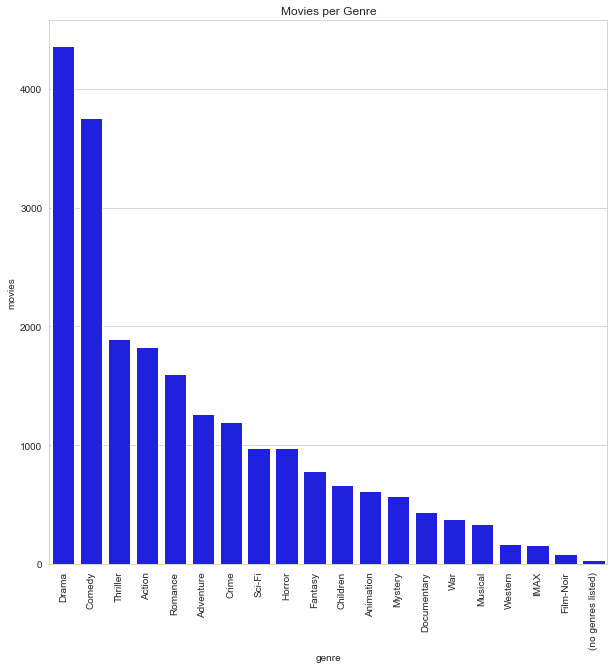

In [348]:
# plotting the genres
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=genre_plot.genre, y=genre_plot.movies, color="blue")
ax.set_title("Movies per Genre")
plt.xticks(rotation=90);

## Extract year from title

In [349]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
df_movies['year'] = df_movies.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
df_movies['year'] = df_movies.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
df_movies['title'] = df_movies.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
df_movies['title'] = df_movies['title'].apply(lambda x: x.strip())
df_movies.head()

/var/folders/65/r_18y6k51qn22_3r6nq8rh280000gn/T/ipykernel_61301/4129146198.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_movies['title'] = df_movies.title.str.replace('(\(\d\d\d\d\))', '')


,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year
0,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
1,2,Jumanji,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
2,3,Grumpier Old Men,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
3,4,Waiting to Exhale,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
4,5,Father of the Bride Part II,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995


In [350]:
df_years.tail(1)

,year,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
104,2017,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


In [351]:
# make a dataframe for years
df_years = df_movies.groupby("year").count().reset_index()
df_years.drop(df_years.tail(1).index, inplace=True) # drop last row, because data for 2018 are not complete
df_years

,year,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1902,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1903,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1908,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1915,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1916,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2013,239,239,239,239,239,239,239,239,239,...,239,239,239,239,239,239,239,239,239,239
101,2014,278,278,278,278,278,278,278,278,278,...,278,278,278,278,278,278,278,278,278,278
102,2015,274,274,274,274,274,274,274,274,274,...,274,274,274,274,274,274,274,274,274,274
103,2016,218,218,218,218,218,218,218,218,218,...,218,218,218,218,218,218,218,218,218,218


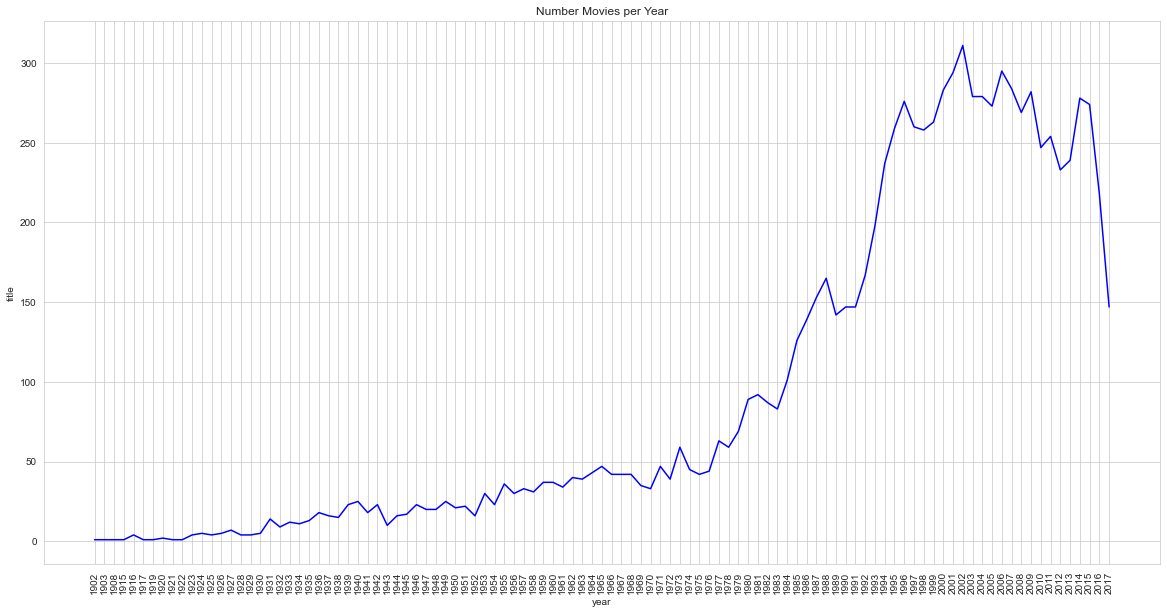

In [352]:
# plotting the years
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=df_years.year, y=df_years.title, color="blue")
ax.set_title("Number Movies per Year")
plt.xticks(rotation=90);

## Merge the movie table with the ratings

In [353]:
# merging
df_rating = df_movies.merge(df_ratings, on="movieId", how="inner")
df_rating.head(5)

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year,userId,rating,timestamp
0,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1995,1,4.0,964982703
1,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1995,5,4.0,847434962
2,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1995,7,4.5,1106635946
3,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1995,15,2.5,1510577970
4,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1995,17,4.5,1305696483


In [354]:
median_rating = df_rating.groupby("title").median().reset_index()

In [355]:
median_rating.head()

,title,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),userId,rating,timestamp
0,'71,117867.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,610.0,4.0,1.493850e+09
1,'Hellboy': The Seeds of Creation,97757.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,332.0,4.0,1.352671e+09
2,'Round Midnight,26564.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,354.5,3.5,1.346507e+09
3,'Salem's Lot,27751.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.0,5.0,1.342827e+09
4,'Til There Was You,779.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,229.0,4.0,1.161440e+09


/Users/janaconradi/neuefische/recommender-system-capstone/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


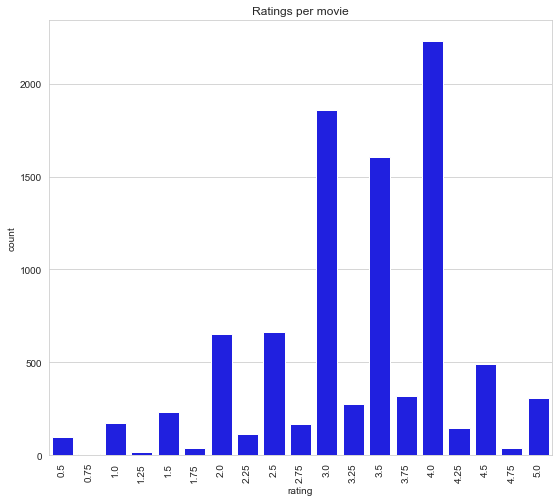

In [356]:
fig, ax = plt.subplots(figsize=(9,8))
sns.countplot(median_rating.rating, color="blue")
ax.set_title("Ratings per movie")
plt.xticks(rotation=90);


In [357]:
median_rating.sort_values(by="rating", ascending=False).head(10)

,title,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),userId,rating,timestamp
2441,Down Argentine Way,83969.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,5.0,1.520409e+09
7437,Siam Sunset,6402.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,5.0,1.520409e+09
3867,Hollywood Shuffle,4116.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,5.0,1.049077e+09
3863,Hollywood Chainsaw Hookers,140133.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,5.0,1.520410e+09
7405,Shogun Assassin,5244.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187.0,5.0,1.161850e+09
3416,"Going Places (Valseuses, Les)",5088.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,5.0,1.474142e+09
7139,"Sandpiper, The",3073.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,572.0,5.0,9.458909e+08
8909,"Very Potter Sequel, A",93008.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,177.0,5.0,1.435721e+09
8497,Tickling Giants,172705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,184.0,5.0,1.537108e+09
8924,Villain,136850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,329.0,5.0,1.523468e+09


## Best rated movies

In [358]:
# check all movies that have median rating of 5.0
top_rated_genre = median_rating.query("rating >= 5")
top_rated_genre.head()

,title,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),userId,rating,timestamp
3,'Salem's Lot,27751.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.0,5.0,1.342827e+09
66,20 Million Miles to Earth,5468.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,377.0,5.0,1.340342e+09
127,61*,27373.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,585.0,5.0,1.307417e+09
131,7 Faces of Dr. Lao,42556.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,377.0,5.0,1.340343e+09
144,9/11,44943.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,390.0,5.0,1.250336e+09


In [361]:
# aggregating the genres by summing and assigning a new dataframe
genre_plot2 = pd.DataFrame(top_rated_genre.iloc[:,2:22].agg(sum)).reset_index()
genre_plot2.columns = ["genre", 'movies']
genre_plot2 = genre_plot2.sort_values(by="movies", ascending=False)
genre_plot2

,genre,movies
3,Comedy,146.0
6,Drama,123.0
1,Animation,65.0
5,Romance,50.0
10,Horror,30.0
4,Fantasy,30.0
8,Crime,30.0
15,Documentary,30.0
2,Children,29.0
7,Action,26.0


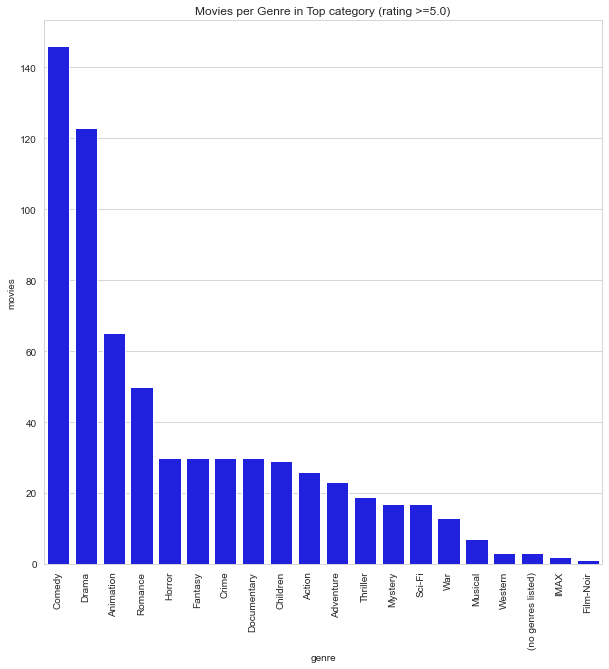

In [363]:
# plotting the top movies genres
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=genre_plot2.genre, y=genre_plot2.movies, color="blue")
ax.set_title("Movies per Genre in Top category (rating >=5.0)")
plt.xticks(rotation=90);

## Most rated movies

In [384]:
# groupby the movie title and count them, then sort 
most_rated = df_rating.groupby("title").sum().reset_index()
most_rated = most_rated.sort_values(by="rating", ascending=False)
most_rated.head(10)

,title,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),userId,rating,timestamp,time_hour
7368,"Shawshank Redemption, The",100806,0.0,0.0,0.0,0.0,0.0,0.0,317.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,95829,1404.0,376924839127,3925
3072,Forrest Gump,117124,0.0,0.0,0.0,329.0,0.0,329.0,329.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,101385,1370.0,386165236681,4083
6657,Pulp Fiction,90872,0.0,0.0,0.0,307.0,0.0,0.0,307.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,90621,1288.5,349204311001,3820
5348,"Matrix, The",714738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,278.0,...,0.0,0.0,0.0,0.0,0.0,0.0,85236,1165.5,350270041779,3249
7454,"Silence of the Lambs, The",165447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,85535,1161.0,320035674330,3494
7767,Star Wars: Episode IV - A New Hope,65260,251.0,0.0,0.0,0.0,0.0,0.0,0.0,251.0,...,0.0,0.0,0.0,0.0,0.0,0.0,76484,1062.0,298509531263,3097
1301,Braveheart,26070,0.0,0.0,0.0,0.0,0.0,0.0,237.0,237.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73375,955.5,259448308280,2757
2931,Fight Club,645062,0.0,0.0,0.0,0.0,0.0,0.0,218.0,218.0,...,0.0,0.0,0.0,0.0,0.0,0.0,69737,931.5,282265436424,2532
7199,Schindler's List,115940,0.0,0.0,0.0,0.0,0.0,0.0,220.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,69481,929.5,257743980936,2729
4521,Jurassic Park,114240,238.0,0.0,0.0,0.0,0.0,0.0,0.0,238.0,...,0.0,0.0,0.0,0.0,0.0,0.0,74065,892.5,257876752969,2870


In [385]:
# worst movies
most_rated = most_rated.sort_values(by="rating", ascending=True)
most_rated.head(10)

,title,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),userId,rating,timestamp,time_hour
7617,Son of God,109897,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,567,0.5,1525289901,19
7945,Superfast!,129250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,448,0.5,1447868930,17
8220,The Emoji Movie,175475,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,184,0.5,1537109570,14
569,Are We There Yet?,31422,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,307,0.5,1186085237,20
4050,I Know Who Killed Me,54274,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,599,0.5,1498502634,18
9274,Wizards of the Lost Kingdom II,157172,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,448,0.5,1492796600,17
1510,Captain America II: Death Too Soon,102749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,599,0.5,1498502565,18
1389,"Brothers Solomon, The",54934,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,298,0.5,1467489584,19
5294,Maria Bamford: The Special Special Special!,104644,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,111,0.5,1517441300,23
9427,Zombie Strippers!,60363,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,68,0.5,1240092818,22


## Identifying the time of rating: When do the people rate the movies?

In [365]:
# converting timestamp to time
df_rating["rating_time"]= pd.to_datetime(df_rating['timestamp'], unit='s')

In [366]:
df_rating.head()

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Documentary,IMAX,Western,Film-Noir,(no genres listed),year,userId,rating,timestamp,rating_time
0,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1995,1,4.0,964982703,2000-07-30 18:45:03
1,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1995,5,4.0,847434962,1996-11-08 06:36:02
2,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1995,7,4.5,1106635946,2005-01-25 06:52:26
3,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1995,15,2.5,1510577970,2017-11-13 12:59:30
4,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1995,17,4.5,1305696483,2011-05-18 05:28:03


## daytime of the rating

In [369]:
df_rating['time_hour'] = df_rating['rating_time'].dt.hour
df_rating

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,IMAX,Western,Film-Noir,(no genres listed),year,userId,rating,timestamp,rating_time,time_hour
0,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1995,1,4.0,964982703,2000-07-30 18:45:03,18
1,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1995,5,4.0,847434962,1996-11-08 06:36:02,6
2,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1995,7,4.5,1106635946,2005-01-25 06:52:26,6
3,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1995,15,2.5,1510577970,2017-11-13 12:59:30,12
4,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1995,17,4.5,1305696483,2011-05-18 05:28:03,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2017,184,4.0,1537109082,2018-09-16 14:44:42,14
100832,193583,No Game No Life: Zero,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2017,184,3.5,1537109545,2018-09-16 14:52:25,14
100833,193585,Flint,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2017,184,3.5,1537109805,2018-09-16 14:56:45,14
100834,193587,Bungo Stray Dogs: Dead Apple,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2018,184,3.5,1537110021,2018-09-16 15:00:21,15


## Check out the tags

In [370]:
# merge the tags with the df_movie
df_tag = df_movies.merge(df_tags, on="movieId", how="inner")
df_tag.head(5)

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year,userId,tag,timestamp
0,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1995,336,pixar,1139045764
1,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1995,474,pixar,1137206825
2,1,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1995,567,fun,1525286013
3,2,Jumanji,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1995,62,fantasy,1528843929
4,2,Jumanji,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1995,62,magic board game,1528843932


In [371]:
df_tag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3683 entries, 0 to 3682
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             3683 non-null   int64  
 1   title               3683 non-null   object 
 2   Adventure           3683 non-null   float64
 3   Animation           3683 non-null   float64
 4   Children            3683 non-null   float64
 5   Comedy              3683 non-null   float64
 6   Fantasy             3683 non-null   float64
 7   Romance             3683 non-null   float64
 8   Drama               3683 non-null   float64
 9   Action              3683 non-null   float64
 10  Crime               3683 non-null   float64
 11  Thriller            3683 non-null   float64
 12  Horror              3683 non-null   float64
 13  Mystery             3683 non-null   float64
 14  Sci-Fi              3683 non-null   float64
 15  War                 3683 non-null   float64
 16  Musica

### How many movies were tagged by users?

In [374]:
df_tag["title"].unique()

array(['Toy Story', 'Jumanji', 'Grumpier Old Men', ..., 'Deadpool 2',
       'Solo: A Star Wars Story', 'Gintama: The Movie'], dtype=object)